In [1]:
import glob
import os
from astropy.io import fits
import numpy as np

pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')
geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]
seddir = '/orange/adamginsburg/w51/TaehwaYoo/SEDmodel/'

b3fluxarr = np.array([]) ; b6fluxarr = np.array([])
b7fluxarr = np.array([])
logmassarr = np.array([]) ; logtemparr = np.array([]) ; loglumarr = np.array([])
for path in geometry: # loop over YSO geometry models
    filepath = seddir+path+'/flux_prop.fits'
   
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    
    
    cols = fluxfile[1].columns
    if not 'mass_los' in cols.names:
        continue
    print(path)
    parfilepath = '/blue/adamginsburg/richardson.t/research/flux/pars/'+ path +'_augmented.fits'
    parfile = fits.open(parfilepath)
    # correction of fluxes considering distances 1kpc -> 5.41 kpc (w51e)
    # select 4th value of the aperture grid = 428 au
    
    b6flux = fluxfile[1].data['b6 flux'][:,3]*1e-3*(1/5.41)**2
    b3flux = fluxfile[1].data['b3 flux'][:,3]*1e-3*(1/5.41)**2
    b7flux = fluxfile[1].data['b7 flux'][:,3]*1e-3*(1/5.41)**2

    
    
    masslos = fluxfile[1].data['mass_los'][:,3]
    logmass = np.log10(masslos)
    templos = fluxfile[1].data['temp_los'][:,3]
    logtemp = np.log10(templos)
    luminosity = parfile[1].data['Model Luminosity']
    loglum = np.log10(luminosity)
    
    logb3flux = np.log10(b3flux) 
    logb6flux = np.log10(b6flux)
    logb7flux = np.log10(b7flux)
    
    
    logtemparr = np.append(logtemparr, logtemp)
    logmassarr = np.append(logmassarr, logmass)
    loglumarr = np.append(loglumarr, loglum)
    
    b3fluxarr = np.append(b3fluxarr,logb3flux)
    b6fluxarr = np.append(b6fluxarr,logb6flux)
    b7fluxarr = np.append(b7fluxarr,logb7flux)
    
b3fluxarr.flatten()
b6fluxarr.flatten()
b7fluxarr.flatten()
logmassarr.flatten()
logtemparr.flatten()
loglumarr.flatten()



s-pbsmi


/scratch/local/63687552/ipykernel_13495/2941867142.py:37: RuntimeWarning: invalid value encountered in log10
  logmass = np.log10(masslos)
/scratch/local/63687552/ipykernel_13495/2941867142.py:39: RuntimeWarning: invalid value encountered in log10
  logtemp = np.log10(templos)


s-p-hmi
spu-hmi


/scratch/local/63687552/ipykernel_13495/2941867142.py:37: RuntimeWarning: divide by zero encountered in log10
  logmass = np.log10(masslos)


spubsmi
s-pbhmi
s-u-smi
s-ubhmi


/scratch/local/63687552/ipykernel_13495/2941867142.py:43: RuntimeWarning: invalid value encountered in log10
  logb3flux = np.log10(b3flux)
/scratch/local/63687552/ipykernel_13495/2941867142.py:44: RuntimeWarning: invalid value encountered in log10
  logb6flux = np.log10(b6flux)
/scratch/local/63687552/ipykernel_13495/2941867142.py:45: RuntimeWarning: invalid value encountered in log10
  logb7flux = np.log10(b7flux)


spu-smi
s-u-hmi
s-ubsmi
spubhmi
s-p-smi


array([ 1.07151206,  1.07151206,  1.07151206, ..., -3.11718314,
        5.18091924,  4.64590429])

In [5]:
print(loglumarr)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
index = np.where((np.isfinite(b3fluxarr))&
                 (np.isfinite(b6fluxarr))&
                 (np.isfinite(logmassarr)))[0]
X = np.vstack((b3fluxarr[index], b6fluxarr[index]-b3fluxarr[index])).T
y = logmassarr[index]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


[ 1.07151206  1.07151206  1.07151206 ... -3.11718314  5.18091924
  4.64590429]


In [6]:
model = RandomForestRegressor(n_estimators=500, max_depth=20,oob_score=True, n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9544840402022634

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.titlesize']=20
plt.rcParams['axes.labelsize']=20
err_log = np.abs(y_test - model.predict(X_test))/y_test
err = np.abs(10**y_test - 10**model.predict(X_test))/10**y_test





In [8]:
index = np.where((np.isfinite(b3fluxarr))&
                 (np.isfinite(b6fluxarr))&
                 (np.isfinite(b7fluxarr))&
                 (np.isfinite(logmassarr)))[0]
X = np.vstack((b3fluxarr[index], b6fluxarr[index]-b3fluxarr[index], b7fluxarr[index]-b6fluxarr[index])).T
y = logmassarr[index]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model2 = RandomForestRegressor(n_estimators=500, max_depth=20,oob_score=True, n_jobs=-1)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)




0.9744435079439157

In [9]:
err_log2 = np.abs(y_test - model2.predict(X_test))/y_test
err2 = np.abs(10**y_test - 10**model2.predict(X_test))/10**y_test


81397.80999821948 15.42115302255065 48881.61806301173 2.9846222842256727
0.25230690327900823 -0.032562828997479296 0.08757197760270521 -0.008545174648308871


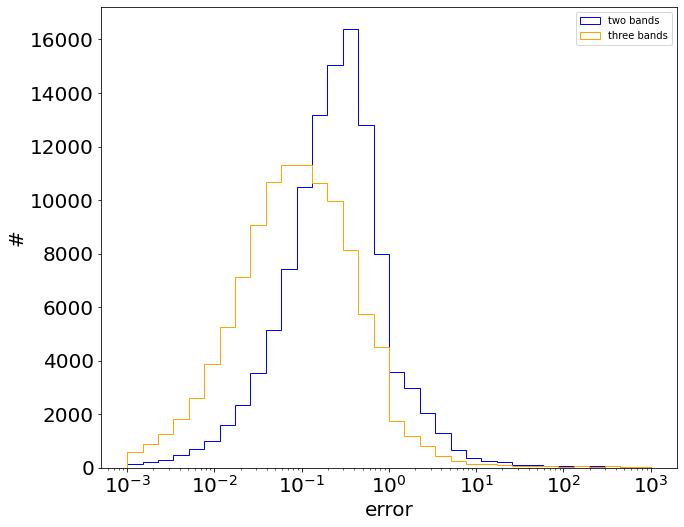

In [10]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
logbins = np.logspace(-3,3,35)
ax1.hist(err, bins=logbins, label='two bands', histtype='stepfilled',facecolor='None',edgecolor='b')
ax1.hist(err2, bins=logbins, label='three bands', histtype='stepfilled',facecolor='None',edgecolor='orange')
ax1.set_xlabel('error')
ax1.set_ylabel('#')
ax1.set_xscale('log')

ax1.legend()
print(np.mean(err),np.mean(err_log),np.mean(err2),np.mean(err_log2))
print(np.median(err),np.median(err_log),np.median(err2),np.median(err_log2))

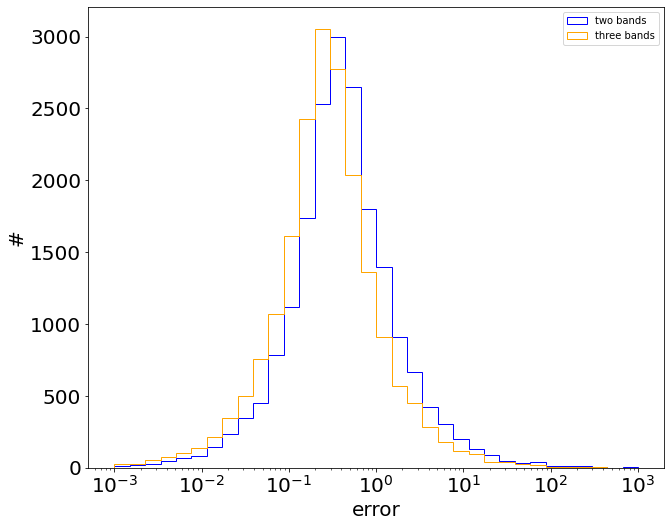

In [11]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
logbins = np.logspace(-3,3,35)
ax1.hist(err_log, bins=logbins, label='two bands', histtype='stepfilled',facecolor='None',edgecolor='b')
ax1.hist(err_log2, bins=logbins, label='three bands', histtype='stepfilled',facecolor='None',edgecolor='orange')
ax1.set_xlabel('error')
ax1.set_ylabel('#')
ax1.set_xscale('log')

ax1.legend()
